<h1><Center>Demonstrating Machine learning model using Shiny</Center></h1>

# Lesson Goals

<div style="text-align: Justify"> Shiny play a very crucial roles when it comes to visualizing your machine learning model to stackholders. In this notebook, we will build a regularized logistic regression that predicts whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two diffeerent tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. Next, we will save the model and build a shiny app and test the app by uploading test data. Finally, we will download the data we uploaded with predictions using the machine learning model we built below. The data is from the famous Machine Learning Coursera Course by Andrew Ng. </div>

______
# Prerequests 
  1. Install R package
  2. Install R studio
  3. Install R libraries that required for this work
  
You can try the shiny app below by uploading the test data here. I have included the code at the bottom.

### Feature engineering and model building

In [1]:
library(caret)
library(tidyverse)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()


In [2]:
df2 = read_csv("ex2data2.txt", col_names = FALSE)
head(df2) 

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double()
)


X1,X2,X3
0.051267,0.69956,1
-0.092742,0.68494,1
-0.213710,0.69225,1
-0.375000,0.50219,1
-0.513250,0.46564,1
-0.524770,0.20980,1


In [3]:
reserved = df2 %>% sample_n(20)
df2_train = df2 %>% setdiff(reserved)

In [4]:
dim(reserved)

[1] 20  3

In [5]:
dim(df2_train)

[1] 98  3

In [6]:
write.csv(reserved, 'test_data.csv', row.names = FALSE)

In [7]:
names(df2_train) = c("Test1", "Test2", "Label")

### Visualizing

The below figure shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary. One way to fit the data better is to create more features from each data point. Let's map the features into all polynomial terms of x1 and x2 up to the sixth power. We have also to save this function for later use with the shiny app to create features from the uploaded data.

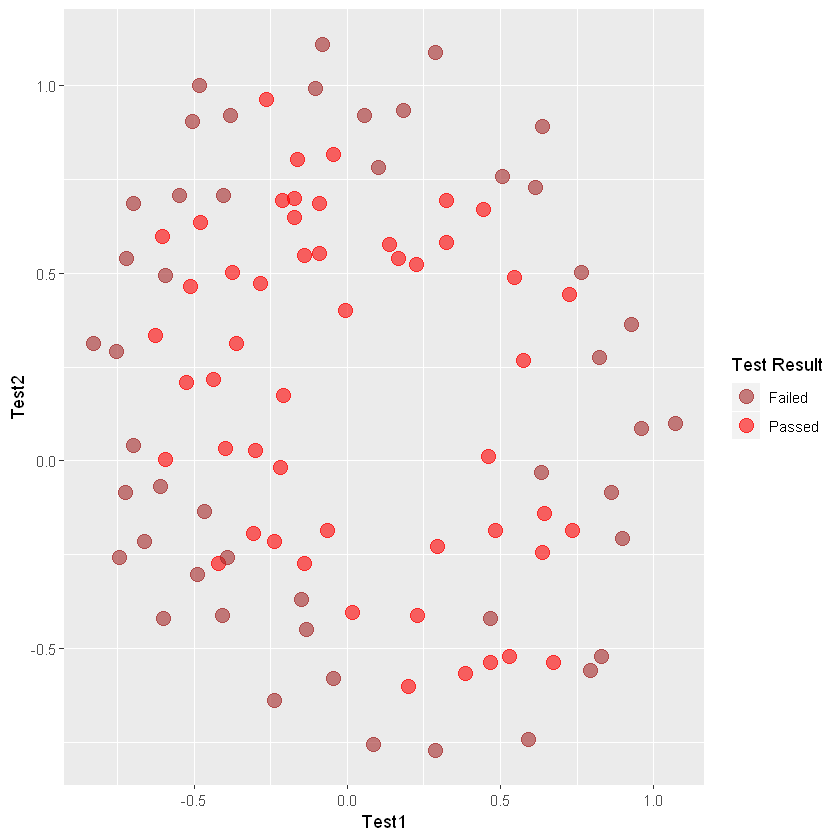

In [12]:
cols <- c("0" = "brown","1" = "red")
df2_train %>% ggplot(aes(x = Test1, y = Test2, color = factor(Label))) + geom_point(size = 4, shape = 19, alpha = 0.6) +
scale_colour_manual(values = cols,labels = c("Failed", "Passed"),name="Test Result")

In [9]:
feature_mapping = function(df){
       new_data = c()

    for(i in 1:6){
        for(j in 0:i){
            temp = (df$Test1)^i+(df$Test2)^(i-j)
            new_data = cbind(new_data,temp)
        }
    }

     colnames(new_data) = paste0("V",1:ncol(new_data))
    new_data
}

In [10]:
mapped = feature_mapping(df2_train)
head(mapped)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27
0.592198,0.907258,0.4777439,0.6935411,1.008601,0.32053699,0.46834512,0.68414232,0.9992023,0.22016895,...,0.469135943,0.68493314,0.9999931,0.103256608,0.150752485,0.220095606,0.321335308,0.469143440,0.68494064,1.000001
0.478540,0.786290,0.5248820,0.7379220,1.045672,0.32197261,0.46944951,0.68248944,0.9902394,0.23172821,...,0.478764279,0.69180422,0.9995542,0.110142162,0.159065140,0.229737552,0.331828434,0.479305331,0.69234527,1.000095
0.127190,0.625000,0.3928198,0.6428150,1.140625,0.07391533,0.19946042,0.44945563,0.9472656,0.08337761,...,0.244779025,0.49477423,0.9925842,0.018821062,0.034721311,0.066383129,0.129430619,0.254975710,0.50497091,1.002781
-0.047610,0.486750,0.4802462,0.7290656,1.263426,-0.03424282,0.08161744,0.33043683,0.8647968,0.11640420,...,0.181204639,0.43002403,0.9643840,0.028472889,0.040170182,0.065291074,0.119240246,0.235100507,0.48391990,1.018280
-0.314970,0.475230,0.3193996,0.4851836,1.275384,-0.13527846,-0.10049699,0.06528697,0.8554870,0.07777351,...,0.004219529,0.17000349,0.9602035,0.020969292,0.021290484,0.022821427,0.030118580,0.064900055,0.23068401,1.020884
-0.363683,0.601960,0.1596162,0.1927928,1.158436,-0.06302325,-0.06188340,-0.02870680,0.9369362,0.02510331,...,-0.008811163,0.02436543,0.9900084,0.003977045,0.003977091,0.003978437,0.004017598,0.005157447,0.03833404,1.003977


In [13]:
df_final = cbind(df2_train, mapped)
dim(df_final)

[1] 98 30

In [14]:
df_final$Label = as.factor(df_final$Label )
levels(df_final$Label) <- c("Failed", "Passed")

### Building a regularized logistic regression model using cross-validation and grid search

In [21]:

cctrl1 <- trainControl(method = "cv", number = 10,
                       allowParallel = TRUE,
                       summaryFunction = twoClassSummary,
                       classProbs = TRUE
                       )


rlGrid <- expand.grid( cost = seq(0.001, 1, length.out = 20),
                       loss =  "L2_primal",
                       epsilon = 0.01 )

my_model <- train(Label ~ .,  data = df_final, 
                  method = 'regLogistic',
                  trControl = cctrl1,
                  metric = "ROC", 
                  preProc = c("center", "scale"),
                  tuneGrid = rlGrid)
my_model

Regularized Logistic Regression 

98 samples
29 predictors
 2 classes: 'Failed', 'Passed' 

Pre-processing: centered (29), scaled (29) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 89, 88, 89, 88, 88, 88, ... 
Resampling results across tuning parameters:

  cost        ROC        Sens   Spec
  0.00100000  0.7916667  0.580  0.86
  0.05357895  0.9183333  0.665  0.90
  0.10615789  0.9183333  0.685  0.88
  0.15873684  0.9150000  0.685  0.86
  0.21131579  0.9076667  0.685  0.84
  0.26389474  0.9010000  0.685  0.84
  0.31647368  0.9010000  0.685  0.84
  0.36905263  0.9010000  0.685  0.84
  0.42163158  0.8976667  0.685  0.82
  0.47421053  0.8976667  0.685  0.82
  0.52678947  0.8926667  0.685  0.82
  0.57936842  0.8966667  0.685  0.82
  0.63194737  0.8966667  0.685  0.82
  0.68452632  0.8966667  0.685  0.82
  0.73710526  0.8966667  0.685  0.82
  0.78968421  0.8966667  0.705  0.82
  0.84226316  0.8966667  0.705  0.82
  0.89484211  0.8966667  0.705  0.80
  0.94742105  0.896666

In [20]:
install.packages("LiblineaR")

package 'LiblineaR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\agurm\AppData\Local\Temp\Rtmpg5akQ9\downloaded_packages


### Save the model. We will further use it in shiny app

In [22]:
save(my_model , file = 'RegularizedLogisticRegression.rda')

### Creating shiny app

#### server.R

In [ ]:
library(caret)
library(shiny)
library(LiblineaR)
library(readr)
library(ggplot2)



load("RegularizedLogisticRegression.rda")          # Load saved model

source("featureMapping.R")                         #  a function for feature engineering. 
                                                   #  You can include data imputation, data manipulation, data cleaning,
                                                   #  feature transformation, etc.,  functions


shinyServer(function(input, output) {
  
  options(shiny.maxRequestSize = 800*1024^2)   # This is a number which specifies the maximum web request size, 
  # which serves as a size limit for file uploads. 
  # If unset, the maximum request size defaults to 5MB.
  # The value I have put here is 80MB
  
  
  output$sample_input_data_heading = renderUI({   # show only if data has been uploaded
    inFile <- input$file1
    
    if (is.null(inFile)){
      return(NULL)
    }else{
      tags$h4('Sample data')
    }
  })
  
  output$sample_input_data = renderTable({    # show sample of uploaded data
    inFile <- input$file1
    
    if (is.null(inFile)){
      return(NULL)
    }else{
      input_data =  readr::read_csv(input$file1$datapath, col_names = TRUE)
      
      colnames(input_data) = c("Test1", "Test2", "Label")
      
      input_data$Label = as.factor(input_data$Label )
      
      levels(input_data$Label) <- c("Failed", "Passed")
      head(input_data)
    }
  })
  
  
  
  predictions<-reactive({
    
    inFile <- input$file1
    
    if (is.null(inFile)){
      return(NULL)
    }else{
      withProgress(message = 'Predictions in progress. Please wait ...', {
        input_data =  readr::read_csv(input$file1$datapath, col_names = TRUE)
        
        colnames(input_data) = c("Test1", "Test2", "Label")
        
        input_data$Label = as.factor(input_data$Label )
        
        levels(input_data$Label) <- c("Failed", "Passed")
        
        mapped = feature_mapping(input_data)
        
        df_final = cbind(input_data, mapped)
        prediction = predict(my_model, df_final)
        
        input_data_with_prediction = cbind(input_data,prediction )
        input_data_with_prediction
        
      })
    }
  })
  
  
  output$sample_prediction_heading = renderUI({  # show only if data has been uploaded
    inFile <- input$file1
    
    if (is.null(inFile)){
      return(NULL)
    }else{
      tags$h4('Sample predictions')
    }
  })
  
  output$sample_predictions = renderTable({   # the last 6 rows to show
    pred = predictions()
    head(pred)
    
  })
  
  
  output$plot_predictions = renderPlot({   # the last 6 rows to show
    pred = predictions()
    cols <- c("Failed" = "red","Passed" = "blue")
    ggplot(pred, aes(x = Test1, y = Test2, color = factor(prediction))) + geom_point(size = 4, shape = 19, alpha = 0.6) +
      scale_colour_manual(values = cols,labels = c("Failed", "Passed"),name="Test Result")
    
  })
  
  
  # Downloadable csv of predictions ----
  
  output$downloadData <- downloadHandler(
    filename = function() {
      paste("input_data_with_predictions", ".csv", sep = "")
    },
    content = function(file) {
      write.csv(predictions(), file, row.names = FALSE)
    })
  
})

#### ui.R

In [ ]:
library(shiny)
library(shinydashboard)
library(shinythemes)

dashboardPage(skin="black",
              dashboardHeader(title=tags$em("Shiny prediction app", style="text-align:center;color:#006600;font-size:100%"),titleWidth = 800),
              
              dashboardSidebar(width = 250,
                               sidebarMenu(
                                 br(),
                                 menuItem(tags$em("Upload Test Data",style="font-size:120%"),icon=icon("upload"),tabName="data"),
                                 menuItem(tags$em("Download Predictions",style="font-size:120%"),icon=icon("download"),tabName="download")
                                 
                                 
                               )
              ),
              
              dashboardBody(
                tabItems(
                  tabItem(tabName="data",
                          
                          
                          br(),
                          br(),
                          br(),
                          br(),
                          tags$h4("With this shiny prediction app, you can upload your data and get back predictions.
                                  The model is a Regularized Logistic Regression that predicts whether microchips from a 
                                  fabrication plant passes quality assurance (QA). During QA, each microchip goes through various 
                                  tests to ensure it is functioning correctly. Suppose you are the product manager of the 
                                  factory and you have the test results for some microchips on two different tests. 
                                  From these two tests, you would like to determine whether the microchips should be accepted or rejected.", style="font-size:150%"),
                          
                          
                          br(),
                          
                          tags$h4("To predict using this model, upload test data in csv format (you can change the code to read other data types) by using the button below.", style="font-size:150%"),
                          
                          tags$h4("Then, go to the", tags$span("Download Predictions",style="color:red"),
                                  tags$span("section in the sidebar to  download the predictions."), style="font-size:150%"),
                          
                          br(),
                          br(),
                          br(),
                          column(width = 4,
                                 fileInput('file1', em('Upload test data in csv format ',style="text-align:center;color:blue;font-size:150%"),multiple = FALSE,
                                           accept=c('.csv')),
                                 
                                 uiOutput("sample_input_data_heading"),
                                 tableOutput("sample_input_data"),
                                 
                                 
                                 br(),
                                 br(),
                                 br(),
                                 br()
                          ),
                          br()
                          
                  ),
                  
                  
                  tabItem(tabName="download",
                          fluidRow(
                            br(),
                            br(),
                            br(),
                            br(),
                            column(width = 8,
                                   tags$h4("After you upload a test dataset, you can download the predictions in csv format by
                                    clicking the button below.", 
                                           style="font-size:200%"),
                                   br(),
                                   br()
                            )),
                          fluidRow(
                            
                            column(width = 7,
                                   downloadButton("downloadData", em('Download Predictions',style="text-align:center;color:blue;font-size:150%")),
                                   plotOutput('plot_predictions')
                            ),
                            column(width = 4,
                                   uiOutput("sample_prediction_heading"),
                                   tableOutput("sample_predictions")
                            )
                            
                          ))
                )))

![title](img/shin.png)

# Further reading

1.Shiny [link](https://shiny.rstudio.com/).

2.Learning shiny eBook (PDF) [link](https://riptutorial.com/ebook/shiny).
 
3.Developing Web Applications in the area of Biostatistics & Data Science [link](https://ibiostat.be/seminar/uploads/introdcution-r-shiny-package-20160330.pdf)
 
 ______
## 7. Conclusion

In this tutorial, you discovered how to develop machine learning model and visualized the saved model using Shiny. focused on a E Studio. 

Specifically, you learned:

* How to make feature engineering and visualise it.
* How to Building a regularized logistic regression model using cross-validation and grid search.
* How to Save the model.
* How to Create shiny app.

# Next Step
There is still much room to improve the model. For example, you can try more options using big data and deep learning technique. I'll write another one for this.